## Análisis Exploratorio de Datos (EDA)

### Librerías:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Datasets
df = pd.read_csv('plataformas.csv')
rating = pd.read_csv('rating.csv')

In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110.0,min,3.548682


In [5]:
rating.head(2)

,userId,score,id
0,1,1.0,as680
1,1,4.5,ns2186


In [6]:
# elimino columnas que no se usaran en el modelo de ML
df = df.drop(['show_id','director', 'cast','country','date_added','release_year','rating','duration','listed_in','description','score','duration_int','duration_type'], axis=1)
df.head(3)

,type,title,id
0,movie,the grand seduction,as1
1,movie,take care good night,as2
2,movie,secrets of deception,as3


In [7]:
# preparo el dataset para machine learning
df_ml = pd.merge(rating,df, on='id', how='left')

# Selecciono solo los datos de tipo 'movie'
df_ml = df_ml[df_ml['type']=='movie']

# Elimino la columna type
df_ml = df_ml.drop(['type'],axis=1)

### Dimensión del dataset

In [80]:
df_ml.shape

(7897251, 4)

In [81]:
df_ml.head(5)

,userId,score,id,title
1,1,4.5,ns2186,latte and the magic waterstone
3,1,5.0,ns3663,"frankenstein’s monster’s monster, frankenstein"
4,1,5.0,as9500,kept woman
6,1,4.5,ns8282,the drowning
7,1,5.0,as6112,salome


### Descripción y cantidad de nulos

In [82]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7897251 entries, 1 to 11024288
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   score   float64
 2   id      object 
 3   title   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 301.3+ MB


In [83]:
df_ml.describe()

,userId,score
count,7.897251e+06,7.897251e+06
mean,8.996638e+04,3.533273e+00
std,8.686520e+04,1.059809e+00
min,1.000000e+00,5.000000e-01
25%,2.854900e+04,3.000000e+00
50%,5.682200e+04,3.500000e+00
75%,1.168520e+05,4.000000e+00
max,2.708960e+05,5.000000e+00


In [84]:
df_ml.isnull().sum()

userId    0
score     0
id        0
title     0
dtype: int64

In [85]:
df_ml.duplicated().sum()

20624

### Primeras conclusiones
- El dataset contiene 20.624 valores duplicados de un total de 7.897.251
- El dataset no contiene valores nulos
- Considerando el sistema de recomendación a modelar, las columnas no requieren de mayores modificaciones

### Distribución de valores 

In [87]:
#Distribución de valores de score
df_ml.score.value_counts()

score
4.0    2128555
3.0    1599507
5.0    1157931
3.5     953167
4.5     658411
2.0     530446
2.5     380413
1.0     251173
1.5     119891
0.5     117757
Name: count, dtype: int64

<AxesSubplot: >

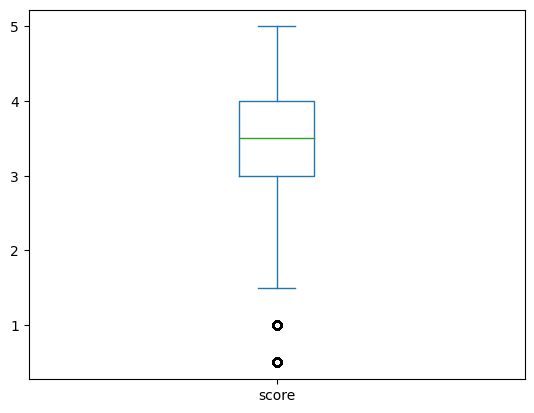

In [100]:
df_ml.score.plot(kind='box')

Text(0.5, 1.0, 'Cantidad de score por pelicula')

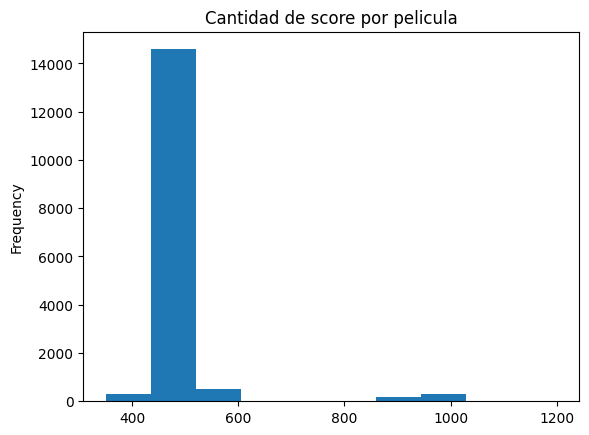

In [103]:
#Distribución de la cantidad de score por pelicula
df_ml.title.value_counts().plot(kind='hist',range=(350,1200))
plt.title('Cantidad de score por pelicula')

Text(0.5, 1.0, 'Cantidad de peliculas puntuadas por usuario')

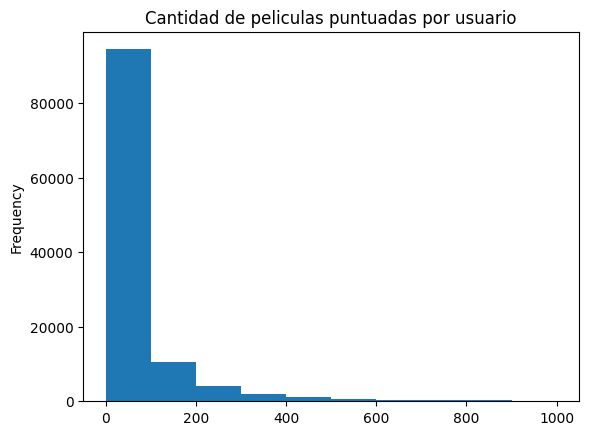

In [107]:
#Cantidad de peliculas puntuadas por usuarios
df_ml.userId.value_counts().sort_values().plot(kind='hist',range=(0,1000))
plt.title('Cantidad de peliculas puntuadas por usuario')

Text(0.5, 1.0, 'Cantidad de peliculas puntuadas por usuario')

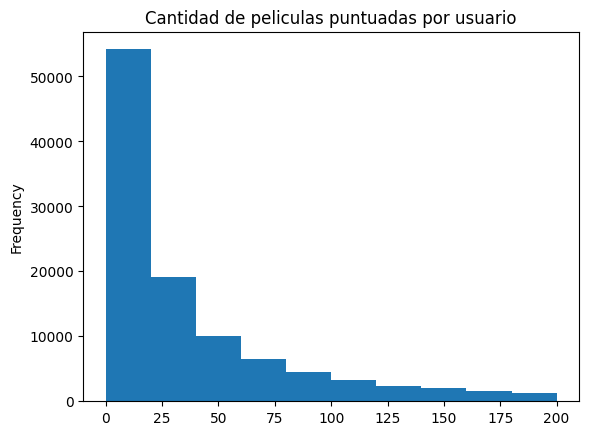

In [109]:
df_ml.userId.value_counts().sort_values().plot(kind='hist',range=(0,200))
plt.title('Cantidad de peliculas puntuadas por usuario')

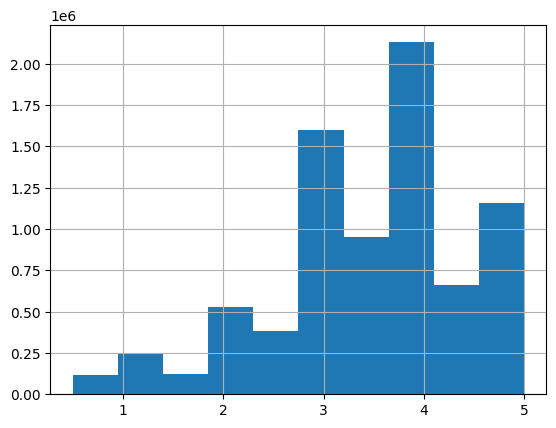

In [8]:
df_ml['score'].hist()
plt.show()

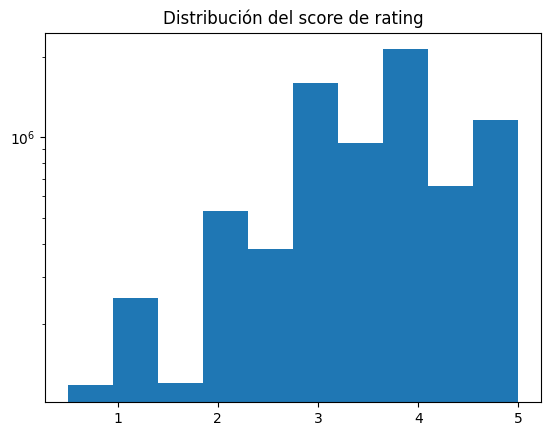

In [9]:
plt.hist(df_ml.score, log=True)
plt.title('Distribución del score de rating')
plt.show()

In [10]:
# Películas con mayor y menor puntuación (score)
rating_movie = df_ml.groupby(['id']).count()
max=df_ml['score'].idxmax()
min = df_ml['score'].idxmin()
print(df_ml.iloc[max].title,df_ml.iloc[max].score)
print(df_ml.iloc[min].title,df_ml.iloc[min].score)

the drowning 4.5
into the ashes 1.0


In [119]:
df_ml

,userId,score,id,title
1,1,4.5,ns2186,latte and the magic waterstone
3,1,5.0,ns3663,"frankenstein’s monster’s monster, frankenstein"
4,1,5.0,as9500,kept woman
6,1,4.5,ns8282,the drowning
7,1,5.0,as6112,salome
...,...,...,...,...
11024284,124380,4.5,ns5272,strong island
11024285,124380,2.5,ns5492,sahara
11024286,124380,3.5,hs305,the last castle
11024287,124380,4.5,ns7881,rocky ii


In [120]:
# Exporto el dataset en formato parquet para el modelo de machine learning
df_ml.to_parquet('dataset_ml.parquet')